# Capstone Breakdown Group 1A

### Business Problem

**Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.**

## Analysis Investigation 

The primary variables that measure the success of a movie are broken into two main buckets: 1) Profit, 2) Popularity 

##### PROFIT ANALYSIS TOPICS:

- Budget v Revenue
- Genre vs. Revenue 
- Popularity v Revenue
- Foreign/Domestic Results vs. Revenue  

##### POPULARITY ANALYSIS TOPICS: X

- Director vs. Popularity/Voter Avg. x
- Genre vs. Popularity/Voter Avg. 
- Domestic/International vs. Popularity/Voter Avg.  


### Potential Additional Insights 
We want to gain insights from our data on the following specific points. We are performing EDA to be able to answer questions regarding:

- Revenue compared to rating of the film (critics and audience) x
- I.P and foreign/domestic revenue x
- Original language to revenue 
- Market: domestic/ global
- Writers and directors to revenue

## Import Packages

In [1]:
# Import packages

import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 
import itertools
%matplotlib inline

## Read In Data

In [2]:
# Read data sets

rtDF = pd.read_csv("Data/rt.movie_info.tsv", sep="\t") #Rotten Tomatoes Movies
rtDF_reviews = pd.read_csv("Data/rt.reviews.tsv", sep="\t", encoding = "latin_1") #Rotten Tomatoes Reviews
bomDF = pd.read_csv("Data/bom.movie_gross.csv") #Box Office Mojo Database
tmdbDF = pd.read_csv("Data/tmdb.movies.csv",index_col=0) #The MovieDB
tnmDF = pd.read_csv("Data/tn.movie_budgets.csv") #The Numbers

conn = sqlite3.connect('Data/im.db')

## Preview Data

In [3]:
#Visualize rotten tomatoes
print(rtDF.info())
# rtDF.head()


#Visualize rotten tomatoes reviews
print(rtDF_reviews.info())
# rtDF_reviews.head()


#Visualize Box office mojo
print(bomDF.info())
# bomDF.head()


#Visualize the movieDB
print(tmdbDF.info())
# tmdbDF.head()


#Visualize the numbers
print(tnmDF.info())
# tnmDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48

## Cleaning Up Data

### Rotten Tomatoes DF Cleaning

In [4]:
#Visualize the data info
print(rtDF.info())

#Check columns to see which ones we want to keep
rtDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


##### Creating a subset DF that only has observations with box office data 

In [5]:
#Create subset data frame with rows that have box_office numbers - only 340 non-null values 
box_officeDF = rtDF[rtDF['box_office'].notna()]

#Check info to see results
box_officeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            340 non-null    int64 
 1   synopsis      340 non-null    object
 2   rating        340 non-null    object
 3   genre         340 non-null    object
 4   director      299 non-null    object
 5   writer        273 non-null    object
 6   theater_date  334 non-null    object
 7   dvd_date      334 non-null    object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       338 non-null    object
 11  studio        305 non-null    object
dtypes: int64(1), object(11)
memory usage: 34.5+ KB


In [6]:
#Drop unnecessary columns from box_office data frame
box_officeDF.drop(columns=['studio','synopsis','dvd_date'],inplace=True)

C:\Users\jvelazquezferrera\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
#Replace the ',' with nothing for each observation in production_budget
box_officeDF['box_office'] = box_officeDF['box_office'].replace([','],'', regex=True)

#Change series to be numeric instead of strings
box_officeDF['box_office'] = pd.to_numeric(box_officeDF['box_office'])

#Check to see results
box_officeDF['box_office'].describe()

<ipython-input-7-4a8c6dfd7508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_officeDF['box_office'] = box_officeDF['box_office'].replace([','],'', regex=True)
<ipython-input-7-4a8c6dfd7508>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_officeDF['box_office'] = pd.to_numeric(box_officeDF['box_office'])


count    3.400000e+02
mean     3.790601e+07
std      5.749159e+07
min      3.630000e+02
25%      1.905152e+06
50%      1.414105e+07
75%      4.482524e+07
max      3.680000e+08
Name: box_office, dtype: float64

#### Back to Normal Rotten Tomatoes DF

In [8]:
#Drop unnecessary columns from original data frame
rtDF.drop(columns=['currency','box_office','studio','synopsis','dvd_date'],inplace=True)

#Check resulting data frame
rtDF.head()

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,200 minutes


In [9]:
#Split genres into a list using pandas' split method
rtDF["genre"] = rtDF["genre"].str.split("|")
rtDF["writer"] = rtDF["writer"].str.split("|")
#View resulting data frame 
rtDF

,id,rating,genre,director,writer,theater_date,runtime
0,1,R,"[Action and Adventure, Classics, Drama]",William Friedkin,[Ernest Tidyman],"Oct 9, 1971",104 minutes
1,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes
2,5,R,"[Drama, Musical and Performing Arts]",Allison Anders,[Allison Anders],"Sep 13, 1996",116 minutes
3,6,R,"[Drama, Mystery and Suspense]",Barry Levinson,"[Paul Attanasio, Michael Crichton]","Dec 9, 1994",128 minutes
4,7,NR,"[Drama, Romance]",Rodney Bennett,[Giles Cooper],NaN,200 minutes
...,...,...,...,...,...,...,...
1555,1996,R,"[Action and Adventure, Horror, Mystery and Sus...",NaN,NaN,"Aug 18, 2006",106 minutes
1556,1997,PG,"[Comedy, Science Fiction and Fantasy]",Steve Barron,"[Terry Turner, Tom Davis, Dan Aykroyd, Bonnie ...","Jul 23, 1993",88 minutes
1557,1998,G,"[Classics, Comedy, Drama, Musical and Performi...",Gordon Douglas,NaN,"Jan 1, 1962",111 minutes
1558,1999,PG,"[Comedy, Drama, Kids and Family, Sports and Fi...",David Mickey Evans,"[David Mickey Evans, Robert Gunter]","Apr 1, 1993",101 minutes


In [10]:
#create new df with row repeated for each individual genre within the list 
rotten_tomatoes_genre = rtDF.explode('genre').reset_index(drop=True)

#group by genre and return count of each 
rotten_tomatoes_genre.groupby('genre')['id'].count()

genre
Action and Adventure           366
Animation                       47
Anime and Manga                  2
Art House and International    265
Classics                       193
Comedy                         550
Cult Movies                      4
Documentary                     69
Drama                          912
Faith and Spirituality          11
Gay and Lesbian                  2
Horror                         134
Kids and Family                 99
Musical and Performing Arts     98
Mystery and Suspense           309
Romance                        198
Science Fiction and Fantasy    172
Special Interest                61
Sports and Fitness              10
Television                      23
Western                         48
Name: id, dtype: int64

### Rotten Tomatoes Review DF Cleaning

In [11]:
#Investigate data info
rtDF_reviews.info()

#Visualize DF 
rtDF_reviews.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [12]:
#Print the total number of nulls in rating column
print(sum(rtDF_reviews['rating'].isna()))

# Dropping top_critic, publisher, and date columns - the information provided is not relevant to the scope of this study
rtDF_reviews.drop(columns=["top_critic","publisher","date"],inplace=True)

13517


In [13]:
#Check to see if rating is a variable that can be cleaned in a timely manner 
# rtDF_reviews['rating'].unique()

#The answer is a resounding no

In [14]:
#Exploring output of the sum of fresh scores grouped by id
# rtDF_reviews.groupby(['id'])['fresh'].sum()

In [15]:
#Exploring output of grouping by id & fresh - want to see count of fresh scores (1) vs. count of rotten scores (0)
# rtDF_reviews.groupby(['id', 'fresh']).size()

In [16]:
#replace with binary value, 1 is fresh
rtDF_reviews['fresh'].replace(['fresh', 'rotten'], [1,0], inplace=True)

In [17]:
#Create df grouped by id
rtDF_grouped = rtDF_reviews.groupby(['id'])

#add column in main df that adds sum of fresh column by grouped id 
rtDF_reviews['sum_fresh'] = rtDF_grouped['fresh'].transform(sum)

#add column in main df that counts the total observations in column grouped by id
rtDF_reviews['count_fresh'] = rtDF_grouped['fresh'].transform('count')

In [18]:
#add column in main df that divides the sum of fresh reviews by the total number of reviews - gives percentages to each movie
rtDF_reviews['percentage'] = rtDF_reviews['sum_fresh'] / rtDF_reviews['count_fresh']
rtDF_reviews

,id,review,rating,fresh,critic,sum_fresh,count_fresh,percentage
0,3,A distinctly gallows take on contemporary fina...,3/5,1,PJ Nabarro,103,163,0.631902
1,3,It's an allegory in search of a meaning that n...,NaN,0,Annalee Newitz,103,163,0.631902
2,3,... life lived in a bubble in financial dealin...,NaN,1,Sean Axmaker,103,163,0.631902
3,3,Continuing along a line introduced in last yea...,NaN,1,Daniel Kasman,103,163,0.631902
4,3,... a perverse twist on neorealism...,NaN,1,NaN,103,163,0.631902
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,1,Laura Sinagra,18,38,0.473684
54428,2000,NaN,1/5,0,Michael Szymanski,18,38,0.473684
54429,2000,NaN,2/5,0,Emanuel Levy,18,38,0.473684
54430,2000,NaN,2.5/5,0,Christopher Null,18,38,0.473684


### Box Office Mojo DF Cleaning

In [19]:
#Investigate data frame info
print(bomDF.info())

#Visualize first portion of DF 
bomDF.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [20]:
# Dropped rows where domestic gross was NaN
bomDF = bomDF[bomDF['domestic_gross'].notna()]

#Replace the comma in foreign_gross with nothing
bomDF['foreign_gross'] = bomDF['foreign_gross'].replace(',','', regex=True)

#Cast column foreign_gross to be type number
bomDF["foreign_gross"] = pd.to_numeric(bomDF["foreign_gross"])

#Drop unnecessary columns
# bomDF.drop(columns=['studio'],inplace=True) - [MAY WANT TO USE IN LATER ANALYSIS]

#Fill foreign_gross null values with zero
bomDF["foreign_gross"] = bomDF["foreign_gross"].fillna(0)

#Check to see that foreign_gross and domestic_gross are both numeric 
bomDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3359 non-null   float64
 4   year            3359 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.5+ KB


### The MovieDB DF Cleaning

In [21]:
#Look at information displayed on table 
print(tmdbDF.info())

#View sample of data 
tmdbDF.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [22]:
#Create manual dictionary of genre ids as keys, and string label as the value - will be used as lookup table 
GenreDict = {28:"Action", 12:"Adventure", 16:"Animation", 35:"Comedy", 80:"Crime",
             99:"Documentary",18:"Drama",10751:"Family",14:"Fantasy",36:"History",
             27:"Horror",10402:"Music",9648:"Mystery",10749:"Romance",
             878:"Science Fiction", 10770:"TV Movie",53:"Thriller",10752:"War",37:"Western"}

In [23]:
#Make each item in genre id an iterable list
tmdbDF['genre_ids'] = tmdbDF['genre_ids'].apply(eval)

#Replace each list item with the corresponding dictionary value
tmdbDF['genre_ids']= tmdbDF['genre_ids'].apply(lambda x: [GenreDict[i] for i in x])

In [24]:
#Check for correct output

# for i in tmdbDF['genre_ids']:
#     for j in i:
#         print(j)


In [25]:
#Quick count of each value 
# tmdbDF['genre_ids'].value_counts()

In [26]:
#Create function that reads in a series of lists and returns a series of each individual element in each list 
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

#Apply function to genre_ids in order to count how often a genre is present in a movie (even if multiple genres in a list)
to_1D(tmdbDF["genre_ids"]).value_counts()

Drama              8303
Comedy             5652
Documentary        4965
Thriller           4207
Horror             3683
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1515
Animation          1486
Adventure          1400
Music              1267
Mystery            1237
Fantasy            1139
TV Movie           1084
History             622
War                 330
Western             205
dtype: int64

In [27]:
#create new df with row repeated for each individual genre within the list 
new_df = tmdbDF.explode('genre_ids').reset_index(drop=True)
#group by genre and return the mean vote average
new_df.groupby('genre_ids')['vote_average'].mean()

genre_ids
Action             5.578560
Adventure          5.930071
Animation          6.464805
Comedy             5.942074
Crime              5.852475
Documentary        6.817946
Drama              6.112200
Family             5.990479
Fantasy            5.952327
History            6.661415
Horror             4.847624
Music              6.952407
Mystery            5.730315
Romance            5.981603
Science Fiction    5.442736
TV Movie           5.806827
Thriller           5.354433
War                6.229394
Western            5.955610
Name: vote_average, dtype: float64

### The Numbers DF Cleaning

In [28]:
#Understanding what data we are working with
print(tnmDF.info())

#Visualize the first few rows of data 
tnmDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
#Cleaning up the production_budget
#Replace the '$' with nothing for each observation in production_budget
tnmDF['production_budget']= tnmDF['production_budget'].apply(lambda x: x.replace('$', ''))
#Replace the ',' with nothing for each observation in production_budget
tnmDF['production_budget'] = tnmDF['production_budget'].replace([','],'', regex=True)
#Change series to be numeric instead of strings
tnmDF['production_budget'] = pd.to_numeric(tnmDF['production_budget'])

#Cleaning up the domestic_gross
#Replace the '$' with nothing for each observation
tnmDF['domestic_gross']= tnmDF['domestic_gross'].apply(lambda x: x.replace('$', ''))
#Replace the ',' with nothing for each observation
tnmDF['domestic_gross'] = tnmDF['domestic_gross'].replace([','],'', regex=True)
#Change series to be numeric instead of strings
tnmDF['domestic_gross'] = pd.to_numeric(tnmDF['domestic_gross'])

#Cleaning up the worldwide_gross 
#Replace the '$' with nothing for each observation
tnmDF['worldwide_gross']= tnmDF['worldwide_gross'].apply(lambda x: x.replace('$', ''))
#Replace the ',' with nothing for each observation
tnmDF['worldwide_gross'] = tnmDF['worldwide_gross'].replace([','],'', regex=True)
#Change series to be numeric instead of strings
tnmDF['worldwide_gross'] = pd.to_numeric(tnmDF['worldwide_gross'])

#Check for correct changes 
tnmDF.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


## Joining Tables

#### Joining Rotten Tomatoes with Rotten Tomatoes Reviews

Aim with this data frame is to look at relationships between genre, director, rating, writer or runtime with the percentage of fresh ratings on movies

In [30]:
#Perform inner join on id
rotten_tomatoes_full = pd.merge(rtDF, rtDF_reviews, on='id', how='inner')

#View results
# rotten_tomatoes_full.head()

#Drop unnecessary columns 
rotten_tomatoes_full.drop(columns=['rating_y','critic','review'],inplace=True)

#View results
rotten_tomatoes_full.head()

,id,rating_x,genre,director,writer,theater_date,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
1,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,0,103,163,0.631902
2,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
3,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902
4,3,R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,"[David Cronenberg, Don DeLillo]","Aug 17, 2012",108 minutes,1,103,163,0.631902


#### Joining The Numbers DF and The MovieDB 

Aim with this data frame is to be able to see if there are relationships between vote_average, popularity, or genre with financial outcomes such as domestic gross or worldwide gross

In [31]:
#Change column name in the movieDB df - need this to be able to join tables on movie title
tmdbDF=tmdbDF.rename(columns={'original_title': 'movie'})

#Inner join tables on movie title
performanceDF = pd.merge(tmdbDF, tnmDF, on='movie', how='inner')

#View results
# performanceDF.head()

#Drop unnecessary columns 
performanceDF.drop(columns=['id_x','id_y','title','release_date_y'],inplace=True)

#View results
performanceDF.head()

,genre_ids,original_language,movie,popularity,release_date_x,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,"[Fantasy, Adventure, Animation, Family]",en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,165000000,217581232,494870992
1,"[Adventure, Action, Science Fiction]",en,Iron Man 2,28.515,2010-05-07,6.8,12368,170000000,312433331,621156389
2,"[Animation, Comedy, Family]",en,Toy Story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516
3,"[Animation, Comedy, Family]",en,Toy Story,28.005,1995-11-22,7.9,10174,30000000,191796233,364545516
4,"[Action, Science Fiction, Adventure]",en,Inception,27.920,2010-07-16,8.3,22186,160000000,292576195,835524642


##### Joining Box Office DF (Rotten Tomatoes DF slice) with Rotten Tomatoes Reviews

Aim with this data frame would be to see if rating has a relationship with box office earnings 

In [32]:
#Perform inner join on id
box_rotten_tomatoes = pd.merge(box_officeDF, rtDF_reviews, on='id', how='inner')

#View results
# rotten_tomatoes_full.head()

#Drop unnecessary columns 
box_rotten_tomatoes.drop(columns=['rating_y','critic','review'],inplace=True)

#View results
box_rotten_tomatoes.head()

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,fresh,sum_fresh,count_fresh,percentage
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,0,103,163,0.631902
2,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
3,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902
4,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,600000,108 minutes,1,103,163,0.631902


##### Joining Box Office Mojo DF with The MovieDB DF 

Aim with this data frame is to look at relationship between studio and rating 

In [33]:
#Change column name in the movieDB df - need this to be able to join tables on movie title
bomDF=bomDF.rename(columns={'title': 'movie'})

#Inner join tables on movie title
studioDF = pd.merge(tmdbDF, bomDF, on='movie', how='inner')

#View results
# performanceDF.head()

#Drop unnecessary columns 
# studioDF.drop(columns=['id_x','id_y','title','release_date_y'],inplace=True)

#View results
studioDF.head()

,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010
1,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010
2,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010
3,"[Animation, Family, Comedy]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010
4,"[Animation, Family, Comedy]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010


## Exploratory Data Analysis 
Begin looking into relationships between variables, uncover information that will form our recommendations to Computing Vision (client)

###### Rotten Tomatoes Analysis
Look at relationships between genre, director, rating, writer or runtime with the percentage of fresh ratings on movies

In [81]:
#genre and fresh rating comparison
df = rotten_tomatoes_full.explode('genre').reset_index(drop=True)
df = df.groupby(["genre"]).mean()
df = df.sort_values(["percentage","count_fresh"],ascending=False)
df.drop(columns=["id","fresh"],inplace=True)
df

,sum_fresh,count_fresh,percentage
genre,,,
Gay and Lesbian,21.000000,23.333333,0.857143
Cult Movies,32.481481,35.370370,0.851852
Documentary,48.164875,60.483871,0.774194
Classics,30.089580,41.873173,0.771806
Art House and International,51.440071,66.501106,0.758072
Sports and Fitness,102.788698,138.823096,0.724816
Special Interest,36.677608,52.671747,0.689332
Animation,89.758543,123.942546,0.674427
Drama,79.648107,116.628199,0.653047


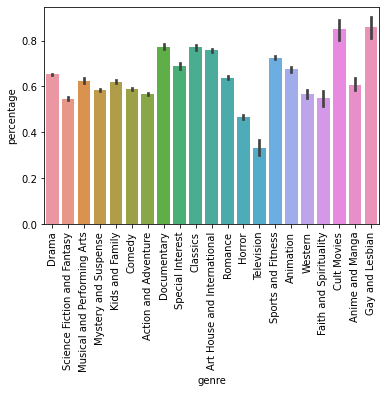

In [86]:
#barplot
df = rotten_tomatoes_full.explode('genre').reset_index(drop=True)
sns.barplot(data=df, x="genre",y="percentage")
plt.xticks(rotation=90);

In [60]:
#director and fresh rating comparison
df = rotten_tomatoes_full
#df.groupby(["director"]).nunique()
df = df.groupby(["director", "id"]).size().reset_index(name="Reviews")
df = df.groupby(["director", "Reviews"]).size().reset_index(name="Movies")
df = df.groupby(["director", "Movies"]).size().reset_index(name="number_of_movies")
df.drop(columns=["Movies"],inplace=True)
df=df.merge(rotten_tomatoes_full.groupby(["director"]).mean(),on="director")
df = df.sort_values(["percentage","number_of_movies"],ascending=False)
df.drop(columns=["id","fresh"],inplace=True)
df

,director,number_of_movies,sum_fresh,count_fresh,percentage
261,Gordon Douglas,2,1.666667,1.666667,1.0
277,Hark Tsui,2,3.400000,3.400000,1.0
342,Jean Negulesco,2,2.600000,2.600000,1.0
833,William Wyler,2,7.461538,7.461538,1.0
5,Alain Tanner,1,2.000000,2.000000,1.0
...,...,...,...,...,...
787,Tom Collins,1,0.000000,1.000000,0.0
798,Tommy Lee Wallace,1,0.000000,1.000000,0.0
800,Tony Maylam,1,0.000000,1.000000,0.0
810,Vernon Sewell,1,0.000000,1.000000,0.0


<AxesSubplot:xlabel='number_of_movies', ylabel='percentage'>

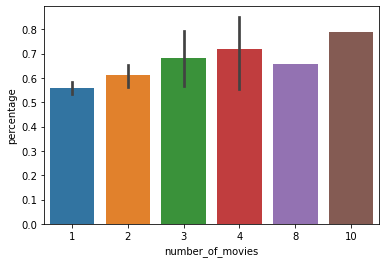

In [63]:
#barplot
sns.barplot(x=df["number_of_movies"],y=df["percentage"])

In [67]:
#rating and fresh rating comparison
df = rotten_tomatoes_full.groupby(["rating_x"]).mean()
df = df.sort_values(["percentage","count_fresh"],ascending=False)
df.drop(columns=["id","fresh"],inplace=True)
df

,sum_fresh,count_fresh,percentage
rating_x,,,
NR,26.994717,35.268679,0.771698
G,46.887955,60.719888,0.722689
PG,64.133034,93.521465,0.641038
R,81.366829,117.196545,0.638505
PG-13,77.381775,135.868281,0.516604


<AxesSubplot:xlabel='rating_x', ylabel='percentage'>

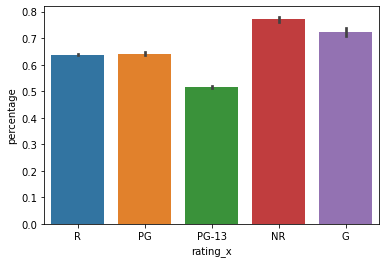

In [72]:
#barplot
sns.barplot(x=rotten_tomatoes_full["rating_x"],y=rotten_tomatoes_full["percentage"])

In [45]:
#writer and fresh rating comparison
exp_df = rotten_tomatoes_full.explode('writer').reset_index(drop=True)
df = exp_df.groupby(["writer", "id"]).size().reset_index(name="Reviews")
df = df.groupby(["writer", "Reviews"]).size().reset_index(name="Movies")
df = df.groupby(["writer", "Movies"]).size().reset_index(name="number_of_movies")
df.drop(columns=["Movies"],inplace=True)
df.sort_values(["number_of_movies"],ascending=False)
df = df.merge(exp_df.groupby(["writer"]).mean(),on="writer")
df = df.sort_values(["percentage","number_of_movies"],ascending=False)
df.drop(columns=["id","fresh"],inplace=True)
df

,writer,number_of_movies,sum_fresh,count_fresh,percentage
1278,Tonino Guerra,2,5.0,5.0,1.0
6,Adolfo Franci,1,6.0,6.0,1.0
11,Alain Tanner,1,2.0,2.0,1.0
13,Alan Campbell,1,1.0,1.0,1.0
15,Alan Rivkin,1,5.0,5.0,1.0
...,...,...,...,...,...
1263,Tom Collins,1,0.0,1.0,0.0
1282,Tony Maylam,1,0.0,1.0,0.0
1343,William Ludwig,1,0.0,1.0,0.0
1346,William Wister Haines,1,0.0,1.0,0.0


In [46]:
#runtime and fresh rating comparison
df = rotten_tomatoes_full.groupby(["runtime"]).mean()
df = df.sort_values(["percentage","count_fresh"],ascending=False)
df.drop(columns=["id","fresh"],inplace=True)
df

,sum_fresh,count_fresh,percentage
runtime,,,
56 minutes,11.000000,11.000000,1.000000
167 minutes,7.222222,7.222222,1.000000
69 minutes,1.500000,1.500000,1.000000
178 minutes,1.000000,1.000000,1.000000
60 minutes,1.000000,1.000000,1.000000
...,...,...,...
82 minutes,30.981651,91.394495,0.348624
83 minutes,16.272251,67.732984,0.319372
147 minutes,2.500000,8.000000,0.312500


###### Performance Analysis
See if there are relationships between vote_average, popularity, or genre with financial outcomes such as domestic gross or worldwide gross

In [47]:
#vote average and financial outcomes comparison
df = performanceDF.groupby(["vote_average"]).mean()
df = df.sort_values(["vote_average"],ascending=False)
df.drop(columns=["popularity","vote_count"],inplace=True)
df

,production_budget,domestic_gross,worldwide_gross
vote_average,,,
10.0,2.303333e+07,2.689354e+07,4.756344e+07
9.0,2.913944e+07,1.168208e+07,2.626088e+07
8.7,3.800000e+07,3.917722e+07,5.097066e+07
8.5,3.100000e+07,1.092045e+07,3.757445e+07
8.4,1.665000e+07,9.206757e+06,2.227234e+07
...,...,...,...
1.5,1.100000e+07,2.521795e+07,4.212666e+07
1.0,3.705833e+07,3.269110e+07,7.411909e+07
0.8,2.000000e+07,0.000000e+00,0.000000e+00


In [48]:
#popularity and financial outcomes comparison
df = performanceDF.groupby(["popularity"]).mean()
df = df.sort_values(["popularity"],ascending=False)
df.drop(columns=["vote_average","vote_count"],inplace=True)
df

,production_budget,domestic_gross,worldwide_gross
popularity,,,
80.773,3.000000e+08,6.788155e+08,2.048134e+09
78.123,3.000000e+07,4.303784e+07,7.623500e+07
53.783,2.500000e+08,2.551198e+08,9.455776e+08
50.289,1.425000e+08,3.233325e+08,7.832607e+08
49.606,1.700000e+08,3.331721e+08,7.708675e+08
...,...,...,...
0.628,1.033333e+06,1.418567e+04,1.418567e+04
0.627,3.900000e+06,3.255400e+04,6.825540e+05
0.625,7.000000e+05,2.695644e+06,2.885064e+06


In [49]:
#genre and financial outcomes comparison
df = performanceDF.explode('genre_ids').reset_index(drop=True)
df = df.groupby(["genre_ids"]).mean()
df = df.sort_values(["genre_ids"],ascending=False)
df.drop(columns=["vote_average","vote_count"],inplace=True)
df

,popularity,production_budget,domestic_gross,worldwide_gross
genre_ids,,,,
Western,11.555815,5.158519e+07,4.546212e+07,1.094540e+08
War,12.511893,4.104107e+07,5.340136e+07,1.103774e+08
Thriller,11.564319,3.156349e+07,3.699230e+07,9.086811e+07
TV Movie,2.448300,2.759500e+07,3.099333e+07,5.678212e+07
Science Fiction,16.134104,7.543509e+07,9.245424e+07,2.486116e+08
Romance,10.182675,2.527989e+07,4.057061e+07,8.830017e+07
Mystery,11.577570,2.568749e+07,3.344472e+07,7.845497e+07
Music,8.906855,2.456613e+07,4.128657e+07,7.855618e+07
Horror,9.104249,1.807368e+07,2.828748e+07,6.283838e+07


###### Rotten Tomato Review & Box Office Analysis 
See if rating has a relationship with box office earnings

In [50]:
#box office and rating comparison 
df = box_rotten_tomatoes.groupby(["percentage"]).mean()
df = df.sort_values(["box_office"],ascending=False)
df.drop(columns=["fresh","id"],inplace=True)
df

,box_office,sum_fresh,count_fresh
percentage,,,
0.485944,368000000.0,121.0,249.0
0.621399,303001229.0,151.0,243.0
0.916031,299300000.0,240.0,262.0
0.391608,279167575.0,56.0,143.0
0.826087,261835892.0,171.0,207.0
...,...,...,...
0.400000,25658.0,12.0,30.0
0.466667,8856.0,7.0,15.0
0.285714,8300.0,2.0,7.0


###### Studio Analysis 
Look at relationship between studio and rating, popularity etc. 

In [51]:
#box office and rating comparison 
df = studioDF
df = df.groupby(["studio", "id"]).size().reset_index(name="Movies")
df = df.groupby(["studio"]).size().reset_index(name="number_of_movies")
df=df.merge(studioDF.groupby(["studio"]).mean(),on="studio")
df = df.sort_values(["popularity","number_of_movies"],ascending=False)
df.drop(columns=["id","year"],inplace=True)
df

,studio,number_of_movies,popularity,vote_average,vote_count,domestic_gross,foreign_gross
25,BV,90,20.035160,6.857000,5016.740000,2.062700e+08,2.752705e+08
143,Studio 8,2,19.165000,6.100000,722.000000,2.995000e+07,3.210000e+07
93,MGM,2,18.528500,6.350000,1809.500000,8.300000e+07,5.630000e+07
141,Sony,72,15.610025,6.072152,2825.025316,9.948987e+07,1.538911e+08
162,WB,112,15.446492,6.486667,3155.125000,9.112167e+07,1.287490e+08
...,...,...,...,...,...,...,...
153,UTMW,1,0.704000,6.000000,2.000000,6.250000e+04,0.000000e+00
53,FEF,1,0.699000,4.800000,3.000000,6.130000e+05,0.000000e+00
16,Argo.,1,0.692000,7.000000,2.000000,2.930000e+04,1.800000e+06
39,DR,1,0.600000,6.000000,1.000000,8.000000e+02,1.100000e+06


## Visualizations
Area to create seaborn & matplotlib graphs 

In [ ]:
# Scatter Plot with budget vs gross
#plt.scatter(x=df['production_budget'], y=df['domestic_gross'])
#plt.title('Production Budget vs. Domestic Gross Earnings')
#plt.xlabel('Domestic Gross Earnings')
#plt.ylabel('Production Budget');

## Statistical Inference
Hypothesis testing, confidence intervals, etc. used to provide inferences about the larger population of movie successes 

# Conclusion
List all recommendations based on findings - consolidate to top 3 for presentation. Additionally will write analysis points we would have liked to investigate further if we were not abiding by a time constraint.

Recommendations:
1)
2)
3)


Bonus (if we had more time):
1)